In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv("/kaggle/input/uber-dataset-csv/UberDataset.csv")
dataset.head()
dataset.shape
dataset.info()

#To fill NUll Values
dataset['PURPOSE'] = dataset['PURPOSE'].fillna("NOT")

#Change START_DATE and END_DATE to date_time format
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'],errors='coerce')
dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'],errors='coerce')

#Split START_DATE to date and time column
from datetime import datetime
dataset['date'] = pd.DatetimeIndex(dataset['START_DATE']).date
dataset['time'] = pd.DatetimeIndex(dataset['START_DATE']).hour

#Convert date and time colunn to Morning,Afternoon,Evening,Night
from datetime import datetime
dataset['date'] = pd.DatetimeIndex(dataset['START_DATE']).date
dataset['time'] = pd.DatetimeIndex(dataset['START_DATE']).hour
#day and night
dataset['day-night'] = pd.cut(x=dataset['time'],bins = [0,10,15,19,24],labels = ['Morning', 'Afternoon','Evening','Night'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


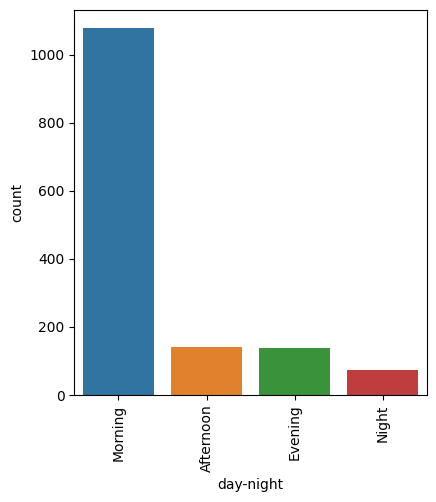

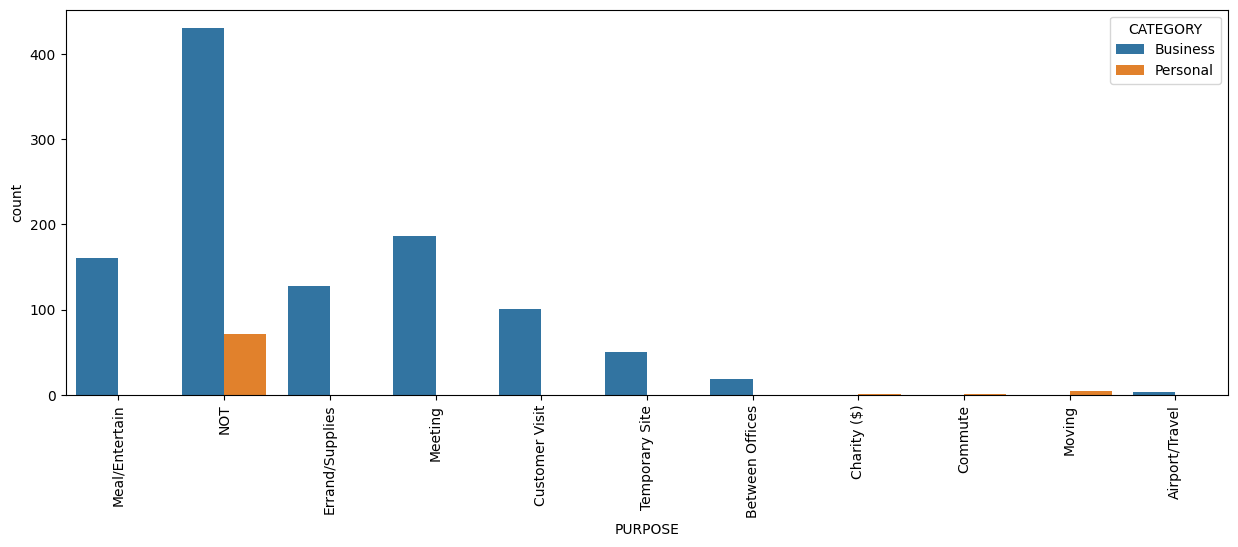

In [2]:

obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
unique_values = {}
for col in object_cols:
    unique_values[col] = dataset[col].unique().size
    unique_values

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x='CATEGORY', data=dataset)
plt.xticks(rotation=90)

plt.xticks(rotation=90)

sns.countplot(x='day-night', data=dataset)
plt.xticks(rotation=90)

#Comparing two different categories
plt.figure(figsize=(15,5))
sns.countplot(data=dataset, x='PURPOSE', hue='CATEGORY')
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


<Axes: >

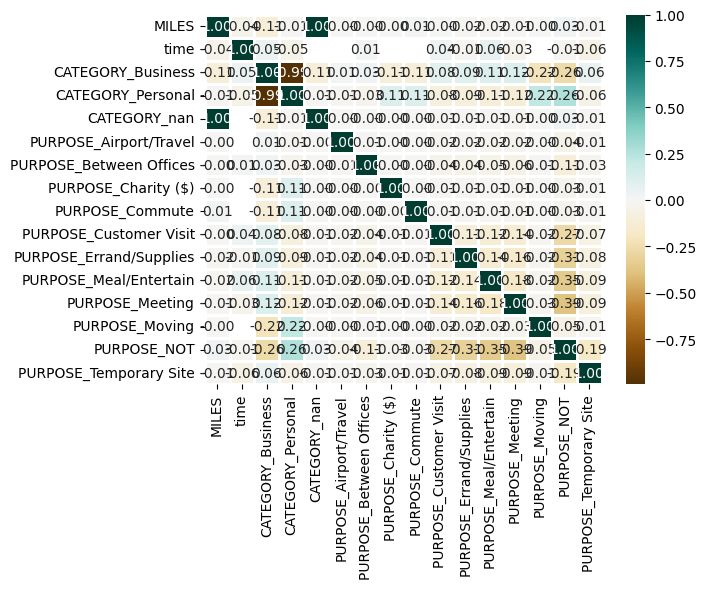

In [3]:
from sklearn.preprocessing import OneHotEncoder
object_cols = ['CATEGORY', 'PURPOSE']
OH_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(dataset[object_cols]))
OH_cols.index = dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = dataset.drop(object_cols, axis=1)
dataset = pd.concat([df_final, OH_cols], axis=1)

numeric_dataset = dataset.select_dtypes(include=['number'])

sns.heatmap(numeric_dataset.corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 0, 'MONTHS'), Text(0, 0.5, 'VALUE COUNT')]

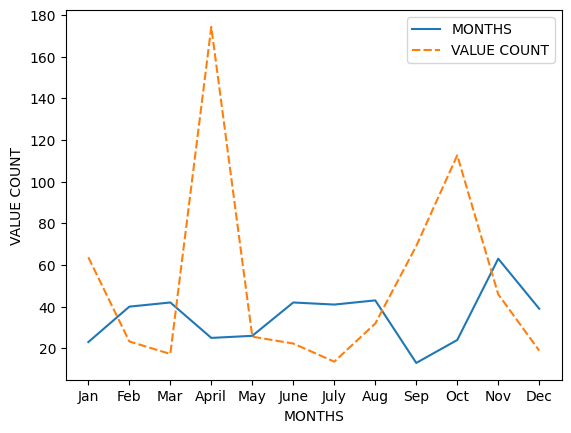

In [4]:
dataset['MONTH'] = pd.DatetimeIndex(dataset['START_DATE']).month
month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April', 5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Aug',
              9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}
dataset["MONTH"] = dataset.MONTH.map(month_label)

mon = dataset.MONTH.value_counts(sort=False)

#Month total rides count vs month ride max count
df = pd.DataFrame({"MONTHS": mon.values, "VALUE COUNT": dataset.groupby('MONTH', sort=False)
                  ['MILES'].max()})
p = sns.lineplot(data=df)
p.set(xlabel="MONTHS", ylabel = "VALUE COUNT")

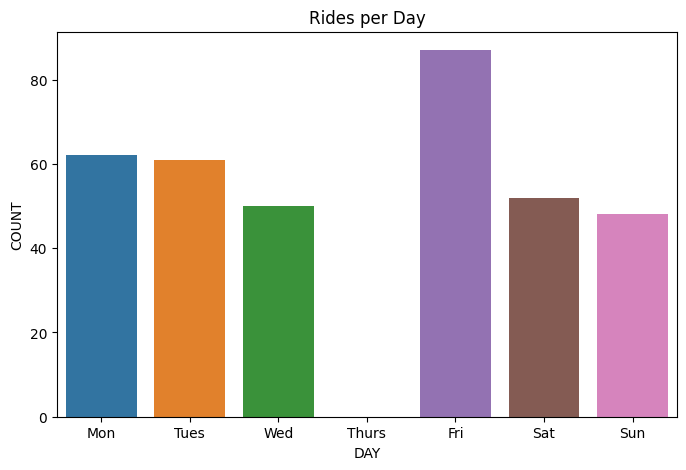

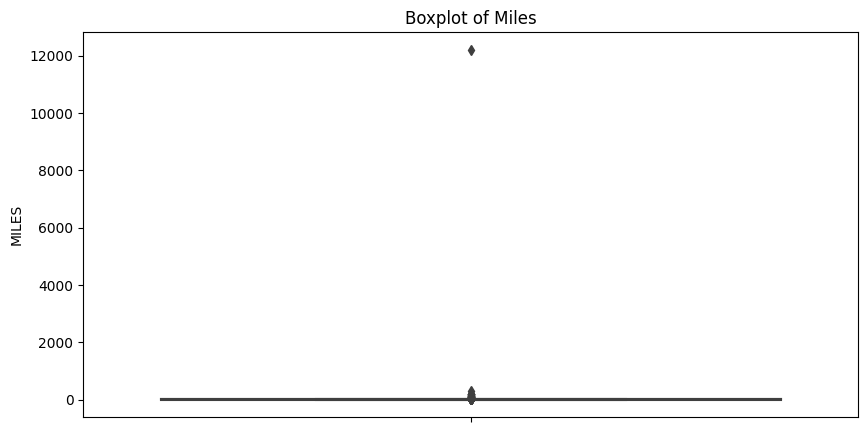

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


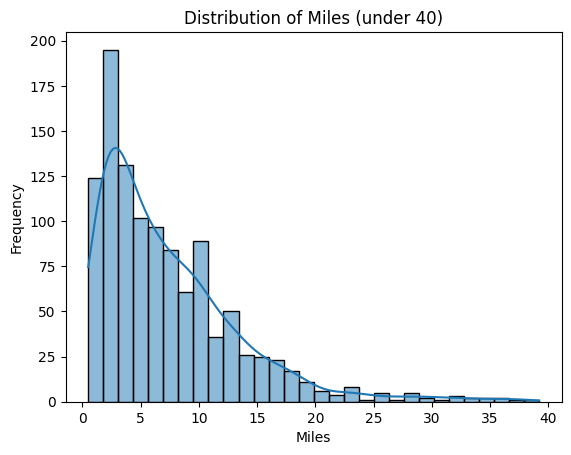

In [5]:
dataset['DAY'] = dataset.START_DATE.dt.weekday
day_label = {
    0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus', 4: 'Fri', 5: 'Sat', 6: 'Sun'
}
dataset['DAY'] = dataset['DAY'].map(day_label)
day_counts = dataset.DAY.value_counts().reindex(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])

plt.figure(figsize=(8,5))
sns.barplot(x=day_counts.index, y=day_counts.values)
plt.xlabel('DAY')
plt.ylabel('COUNT')
plt.title('Rides per Day')
plt.show()


# --- Distribution of Miles ---
plt.figure(figsize=(10,5))

# 1️⃣ Boxplot to check for outliers
sns.boxplot(y=dataset['MILES'])
plt.title('Boxplot of Miles')
plt.show()

# 2️⃣ Histogram + KDE to replace distplot
sns.histplot(dataset[dataset['MILES'] < 40]['MILES'], kde=True, bins=30)
plt.title('Distribution of Miles (under 40)')
plt.xlabel('Miles')
plt.ylabel('Frequency')
plt.show()